# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Script for github 
import nbformat

# Load the notebook
with open('lab1-dopolnitelno-moe-(01_11_2024).ipynb', 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Add execution_count to each code cell if missing
for cell in notebook.cells:
    if cell.cell_type == 'code' and 'execution_count' not in cell:
        cell['execution_count'] = None

# Save the notebook
with open('lab1-dopolnitelno-moe-(01_11_2024).ipynb', 'w', encoding='utf-8') as f:
    nbformat.write(notebook, f)

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
os.environ['MallocStackLogging'] = '0'

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [5]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [6]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script type="text/javascript" async="" src="//pm-widget.taboola.com/yahooweb-network/load.js"></script>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
         <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect" href="//query1.finance.yahoo.com"><link rel="preconnect" href="//query2.finance.yahoo.com"><link rel="preconnect" href="//consent.cmp.oath.com"><link rel="preload" href="/__rapidworker-1.2.js" as="worker"><link rel="preconnect" href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.4b1559b8e4645fd93a12.js"><link rel="preconnect" href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js"><script

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [7]:
# Write your code her
crypto_names = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(1) a')
prices = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(4)')
market_caps = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(7)')

# Store the extracted data in lists
names = [name.text for name in crypto_names]
caps = [cap.text for cap in market_caps]
price_values = [price.text for price in prices]

In [8]:
names

['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'XRP-USD',
 'BNB-USD',
 'SOL-USD',
 'DOGE-USD',
 'USDC-USD',
 'STETH-USD',
 'ADA-USD',
 'WTRX-USD',
 'TRX-USD',
 'AVAX-USD',
 'LINK-USD',
 'TON11419-USD',
 'WSTETH-USD',
 'SHIB-USD',
 'WBTC-USD',
 'SUI20947-USD',
 'HBAR-USD',
 'WETH-USD',
 'XLM-USD',
 'DOT-USD',
 'BGB-USD',
 'BCH-USD']

In [9]:
caps

['1.952T',
 '413.678B',
 '139.315B',
 '129.412B',
 '101.231B',
 '93.467B',
 '48.034B',
 '43.156B',
 '33.216B',
 '31.436B',
 '22.394B',
 '22.074B',
 '16.107B',
 '15.174B',
 '15.078B',
 '15.046B',
 '13.157B',
 '13.094B',
 '12.853B',
 '11.858B',
 '11.663B',
 '11.338B',
 '11.167B',
 '9.023B',
 '8.991B']

In [10]:
price_values

['98,575.57',
 '3,434.08',
 '0.999188',
 '2.2604',
 '702.96',
 '194.91',
 '0.325974',
 '1.0000',
 '3,434.88',
 '0.894812',
 '0.256163',
 '0.256051',
 '39.30',
 '23.78',
 '5.9081',
 '4,099.53',
 '0.000022',
 '98,441.87',
 '4.3901',
 '0.310002',
 '3,455.39',
 '0.374323',
 '7.2875',
 '6.4449',
 '453.95']

In [11]:
crypto = [] 

for i in range(len(crypto_names)):
    dict = {
        "Crypto Name" : crypto_names[i].get_attribute("title"),
        "Crypto Price" : prices[i].text.replace(',',''),
        "Market Cap" : market_caps[i].text
    }
    
    crypto.append(dict)

crypto

[{'Crypto Name': 'Bitcoin USD',
  'Crypto Price': '98575.57',
  'Market Cap': '1.952T'},
 {'Crypto Name': 'Ethereum USD',
  'Crypto Price': '3434.08',
  'Market Cap': '413.678B'},
 {'Crypto Name': 'Tether USDt USD',
  'Crypto Price': '0.999188',
  'Market Cap': '139.315B'},
 {'Crypto Name': 'XRP USD',
  'Crypto Price': '2.2604',
  'Market Cap': '129.412B'},
 {'Crypto Name': 'BNB USD',
  'Crypto Price': '702.96',
  'Market Cap': '101.231B'},
 {'Crypto Name': 'Solana USD',
  'Crypto Price': '194.91',
  'Market Cap': '93.467B'},
 {'Crypto Name': 'Dogecoin USD',
  'Crypto Price': '0.325974',
  'Market Cap': '48.034B'},
 {'Crypto Name': 'USD Coin USD',
  'Crypto Price': '1.0000',
  'Market Cap': '43.156B'},
 {'Crypto Name': 'Lido Staked ETH USD',
  'Crypto Price': '3434.88',
  'Market Cap': '33.216B'},
 {'Crypto Name': 'Cardano USD',
  'Crypto Price': '0.894812',
  'Market Cap': '31.436B'},
 {'Crypto Name': 'Wrapped TRON USD',
  'Crypto Price': '0.256163',
  'Market Cap': '22.394B'},
 {'Cry

In [12]:
df = pd.DataFrame(crypto)

In [13]:
df

,Crypto Name,Crypto Price,Market Cap
0,Bitcoin USD,98575.57,1.952T
1,Ethereum USD,3434.08,413.678B
2,Tether USDt USD,0.999188,139.315B
3,XRP USD,2.2604,129.412B
4,BNB USD,702.96,101.231B
5,Solana USD,194.91,93.467B
6,Dogecoin USD,0.325974,48.034B
7,USD Coin USD,1.0000,43.156B
8,Lido Staked ETH USD,3434.88,33.216B
9,Cardano USD,0.894812,31.436B


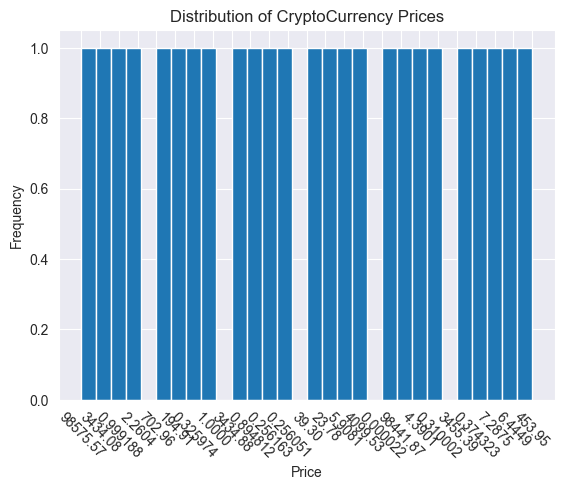

In [14]:
plt.hist(df['Crypto Price'], bins=30)
plt.title("Distribution of CryptoCurrency Prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=315)
browser.quit()

In [15]:
crypto = df.to_csv('crypto.csv')

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

In [16]:
driver = webdriver.Chrome(options=options)

In [17]:
driver.get("https://finance.yahoo.com/quote/BTC-USD/")

In [18]:
# Click on the Historical data tab
historical_data = driver.find_element(By.LINK_TEXT, 'Historical Data')
historical_data.click()

In [19]:
historical_data_price = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(5)")
historical_data_date = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(1)")
historical_data_market_cap = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(7)")

data_prices = [price.text for price in historical_data_price]
date_values = [date.text for date in historical_data_date]
data_market_cap = [cape.text for cape in historical_data_market_cap]

In [20]:
data_prices

['98,575.57',
 '98,676.09',
 '94,686.24',
 '95,104.94',
 '97,224.73',
 '97,755.93',
 '97,490.95',
 '100,041.54',
 '106,140.60',
 '106,029.72',
 '104,298.70',
 '101,372.97',
 '101,459.26',
 '100,043.00',
 '101,173.03',
 '96,675.43',
 '97,432.72',
 '101,236.02',
 '99,923.34',
 '99,920.71',
 '96,593.57',
 '98,768.53',
 '96,002.16',
 '95,865.30',
 '97,279.79',
 '96,449.05',
 '97,461.52',
 '95,652.47',
 '95,962.53',
 '91,985.32',
 '93,102.30',
 '98,013.82',
 '97,777.28',
 '98,997.66',
 '98,504.73',
 '94,339.49',
 '92,343.79',
 '90,542.64',
 '89,845.85',
 '90,558.48',
 '91,066.01',
 '87,250.43',
 '90,584.16',
 '87,955.81',
 '88,701.48',
 '80,474.19',
 '76,778.87',
 '76,545.48',
 '75,904.86',
 '75,639.08',
 '69,359.56',
 '67,811.51',
 '68,741.12',
 '69,289.27',
 '69,482.47',
 '70,215.19',
 '72,339.54',
 '72,720.49',
 '69,907.76',
 '67,929.30',
 '67,014.70',
 '66,642.41',
 '68,161.05',
 '66,432.20',
 '67,361.41',
 '67,367.85',
 '69,001.70',
 '68,362.73',
 '68,418.79',
 '67,399.84',
 '67,612.72

In [21]:
date_values

['Dec 26, 2024',
 'Dec 24, 2024',
 'Dec 23, 2024',
 'Dec 22, 2024',
 'Dec 21, 2024',
 'Dec 20, 2024',
 'Dec 19, 2024',
 'Dec 18, 2024',
 'Dec 17, 2024',
 'Dec 16, 2024',
 'Dec 15, 2024',
 'Dec 14, 2024',
 'Dec 13, 2024',
 'Dec 12, 2024',
 'Dec 11, 2024',
 'Dec 10, 2024',
 'Dec 9, 2024',
 'Dec 8, 2024',
 'Dec 7, 2024',
 'Dec 6, 2024',
 'Dec 5, 2024',
 'Dec 4, 2024',
 'Dec 3, 2024',
 'Dec 2, 2024',
 'Dec 1, 2024',
 'Nov 30, 2024',
 'Nov 29, 2024',
 'Nov 28, 2024',
 'Nov 27, 2024',
 'Nov 26, 2024',
 'Nov 25, 2024',
 'Nov 24, 2024',
 'Nov 23, 2024',
 'Nov 22, 2024',
 'Nov 21, 2024',
 'Nov 20, 2024',
 'Nov 19, 2024',
 'Nov 18, 2024',
 'Nov 17, 2024',
 'Nov 16, 2024',
 'Nov 15, 2024',
 'Nov 14, 2024',
 'Nov 13, 2024',
 'Nov 12, 2024',
 'Nov 11, 2024',
 'Nov 10, 2024',
 'Nov 9, 2024',
 'Nov 8, 2024',
 'Nov 7, 2024',
 'Nov 6, 2024',
 'Nov 5, 2024',
 'Nov 4, 2024',
 'Nov 3, 2024',
 'Nov 2, 2024',
 'Nov 1, 2024',
 'Oct 31, 2024',
 'Oct 30, 2024',
 'Oct 29, 2024',
 'Oct 28, 2024',
 'Oct 27, 2024'

In [22]:
data_market_cap

['36,011,442,176',
 '47,114,953,674',
 '65,239,002,919',
 '43,147,981,314',
 '51,765,334,294',
 '105,634,083,408',
 '97,221,662,392',
 '93,865,656,139',
 '68,589,364,868',
 '91,020,417,816',
 '51,145,914,137',
 '40,422,968,793',
 '56,894,751,583',
 '72,073,983,533',
 '85,391,409,936',
 '104,823,780,634',
 '110,676,473,908',
 '44,125,751,925',
 '44,177,510,897',
 '94,534,772,658',
 '149,218,945,580',
 '77,199,817,112',
 '67,067,810,961',
 '72,680,784,305',
 '36,590,695,296',
 '31,634,227,866',
 '54,968,682,476',
 '52,260,008,261',
 '71,133,452,438',
 '91,656,519,855',
 '80,909,462,490',
 '51,712,020,623',
 '44,414,644,677',
 '78,473,580,551',
 '106,024,505,582',
 '71,730,956,426',
 '74,521,048,295',
 '75,535,775,084',
 '46,350,159,305',
 '44,333,192,814',
 '78,243,109,518',
 '87,616,705,248',
 '123,559,027,869',
 '133,673,285,375',
 '117,966,845,037',
 '82,570,594,495',
 '29,009,480,361',
 '55,176,858,003',
 '63,467,654,989',
 '118,592,653,963',
 '46,046,889,204',
 '41,184,819,348',
 '3

In [23]:
hist_data = [] 

for i in range(len(historical_data_price)):
    
    dict = {
        "Date for BTC/USD" : historical_data_date[i].text,
        "Historical data for BTC/USD - Price" : historical_data_price[i].text.replace(',',''), 
        "Historical data for BTC/USD - Market Cap" : historical_data_market_cap[i].text.replace(',','')
    }
    
    hist_data.append(dict)

hist_data

[{'Date for BTC/USD': 'Dec 26, 2024',
  'Historical data for BTC/USD - Price': '98575.57',
  'Historical data for BTC/USD - Market Cap': '36011442176'},
 {'Date for BTC/USD': 'Dec 24, 2024',
  'Historical data for BTC/USD - Price': '98676.09',
  'Historical data for BTC/USD - Market Cap': '47114953674'},
 {'Date for BTC/USD': 'Dec 23, 2024',
  'Historical data for BTC/USD - Price': '94686.24',
  'Historical data for BTC/USD - Market Cap': '65239002919'},
 {'Date for BTC/USD': 'Dec 22, 2024',
  'Historical data for BTC/USD - Price': '95104.94',
  'Historical data for BTC/USD - Market Cap': '43147981314'},
 {'Date for BTC/USD': 'Dec 21, 2024',
  'Historical data for BTC/USD - Price': '97224.73',
  'Historical data for BTC/USD - Market Cap': '51765334294'},
 {'Date for BTC/USD': 'Dec 20, 2024',
  'Historical data for BTC/USD - Price': '97755.93',
  'Historical data for BTC/USD - Market Cap': '105634083408'},
 {'Date for BTC/USD': 'Dec 19, 2024',
  'Historical data for BTC/USD - Price': '9

In [24]:
df = pd.DataFrame(hist_data)

In [25]:
df

,Date for BTC/USD,Historical data for BTC/USD - Price,Historical data for BTC/USD - Market Cap
0,"Dec 26, 2024",98575.57,36011442176
1,"Dec 24, 2024",98676.09,47114953674
2,"Dec 23, 2024",94686.24,65239002919
3,"Dec 22, 2024",95104.94,43147981314
4,"Dec 21, 2024",97224.73,51765334294
...,...,...,...
361,"Dec 30, 2023",42156.90,16013925945
362,"Dec 29, 2023",42099.40,26000021055
363,"Dec 28, 2023",42627.86,22992093014
364,"Dec 27, 2023",43442.86,25260941032


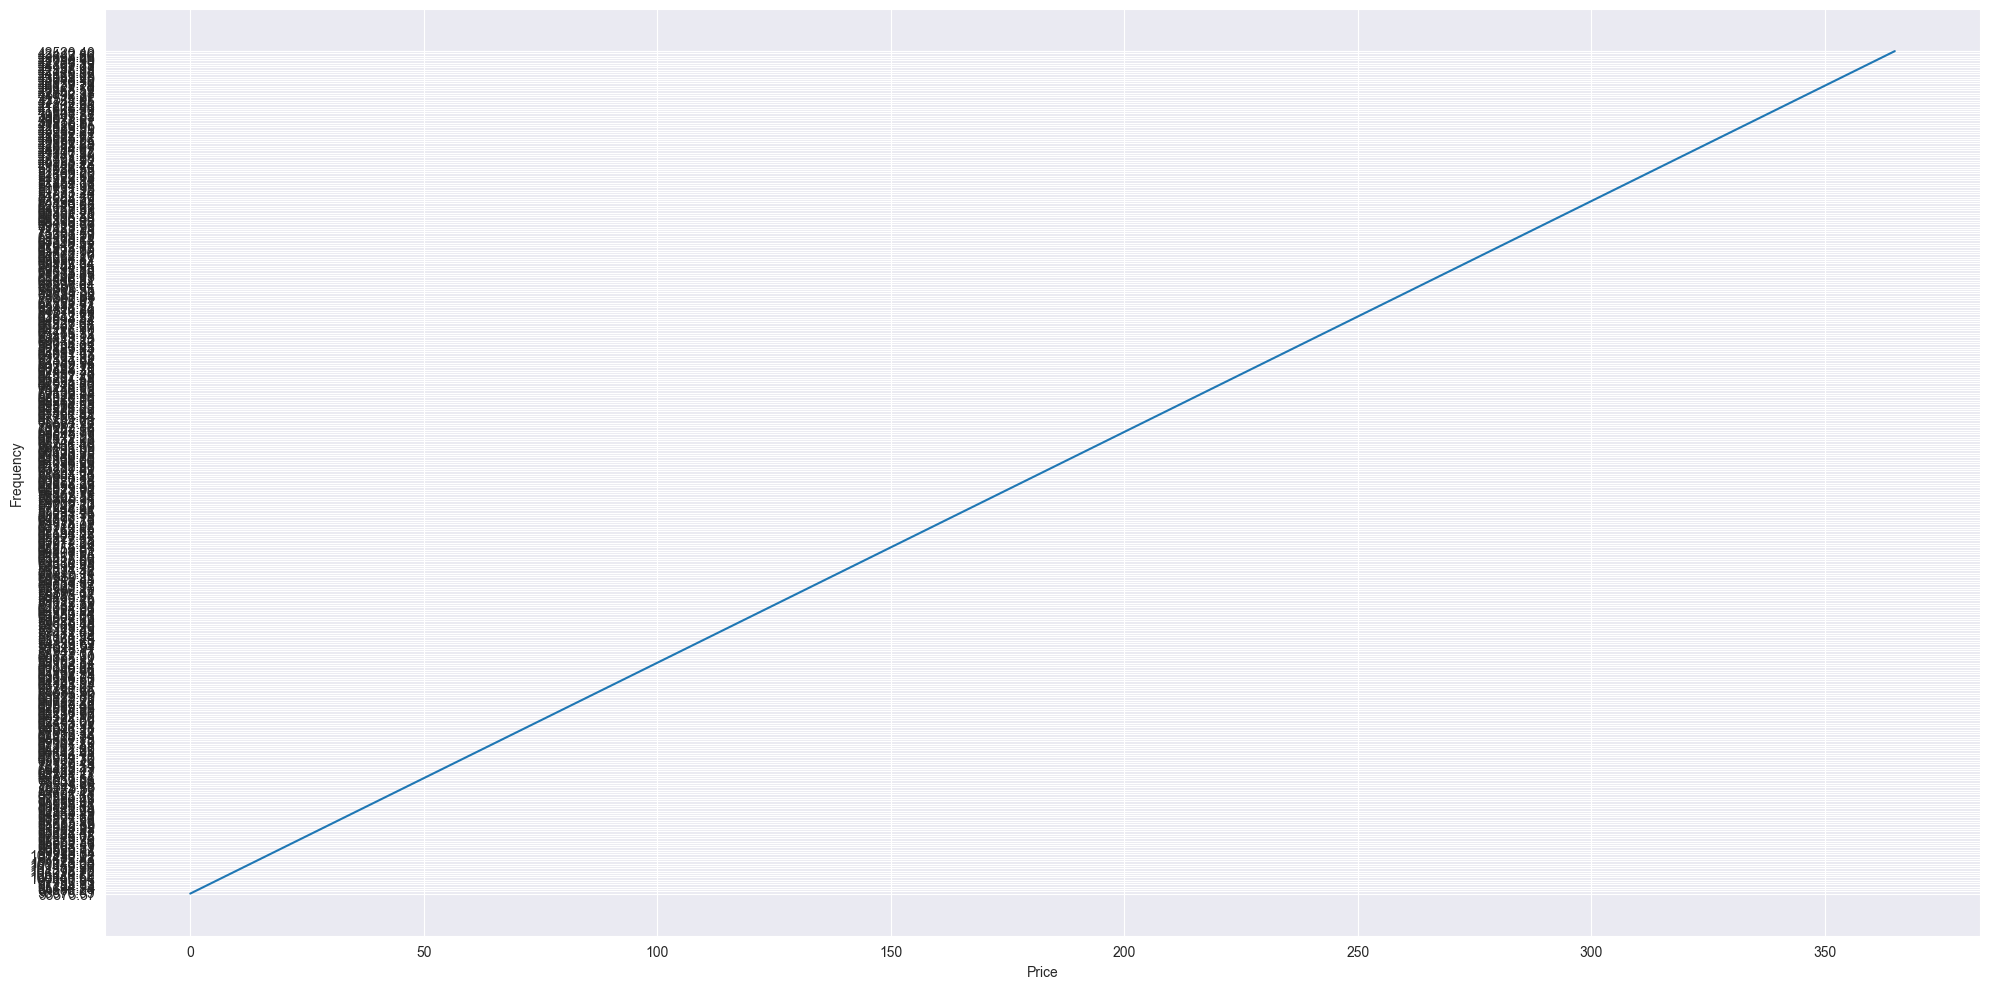

In [26]:
plt.figure(figsize=(20,10))
plt.plot(df['Historical data for BTC/USD - Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
driver.quit()

In [27]:
historical_data_btc = df.to_csv('historical_data_btc.csv')